# Lending Club Case Study

### Group Members

**1. Leela Guna Krishna Kompalli** <br>
**2. Vinay V**

In [386]:
# Importing Data

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

### Data Understanding

In [387]:
# Read the dataframe

df = pd.read_csv('loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [388]:
# Checking dtypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [389]:
# Checking shape
df.shape

(39717, 111)

### Data Cleaning

In [390]:
# Removing null/missing values

missing_percentage = df.isnull().sum() * 100 / len(df)
missing_dataframe = pd.DataFrame({'column': df.columns, 'percentage': missing_percentage.round(2)})
df_cleaned = df.drop(missing_dataframe[missing_dataframe.percentage == 100].column.tolist(), axis = 1)

In [391]:
df_cleaned.isnull().sum() * 100 / len(df)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [392]:
# There are few unnecessary columns and need to be dropped

df_cleaned = df_cleaned.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'delinq_amnt', 'acc_now_delinq', 'application_type', 'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [393]:
df_cleaned.shape

(39717, 41)

In [394]:
# emp_title can be dropped as it is not going to be useful

df_cleaned = df_cleaned.drop('emp_title', axis = 1)

In [395]:
(df_cleaned.isnull().sum() * 100 / len(df_cleaned)).sort_values(ascending = False)

emp_length                2.71
pub_rec_bankruptcies      1.75
last_pymnt_d              0.18
revol_util                0.13
title                     0.03
last_credit_pull_d        0.01
annual_inc                0.00
zip_code                  0.00
purpose                   0.00
loan_status               0.00
issue_d                   0.00
verification_status       0.00
funded_amnt               0.00
addr_state                0.00
sub_grade                 0.00
grade                     0.00
installment               0.00
int_rate                  0.00
term                      0.00
funded_amnt_inv           0.00
home_ownership            0.00
delinq_2yrs               0.00
dti                       0.00
earliest_cr_line          0.00
last_pymnt_amnt           0.00
collection_recovery_fee   0.00
recoveries                0.00
total_rec_late_fee        0.00
total_rec_int             0.00
total_rec_prncp           0.00
total_pymnt_inv           0.00
total_pymnt               0.00
out_prnc

So the highest percentage of **missing data** is **2.71** which is pretty much efficient

In [396]:
# Checking NaN or NULL Value Percentage in Rows greater than 1%

rows = pd.DataFrame(data = round(df.isnull().sum(axis = 1)/len(df), 2)*100, columns = ['null_percentage'])
rows[rows.null_percentage >= 1].index

Int64Index([], dtype='int64')

Hence there are no rows with null value percentage greater than **2%**

In [397]:
df_cleaned.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [398]:
# verification_status, zip_code, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, revol_bal can be removed

df_cleaned.drop(['verification_status', 'zip_code', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'revol_bal'], axis = 1, inplace = True)

In [399]:
df_cleaned.isnull().sum() * 100 / len(df_cleaned)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
out_prncp              0.00
out_prncp_inv          0.00
total_pymnt            0.00
total_pymnt_inv        0.00
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

In [400]:
# Removing columns with home_ownership as NONE

df_cleaned = df_cleaned[df_cleaned.home_ownership != 'NONE']

# Removing duplicate rows
df_cleaned.drop_duplicates(keep = 'first', inplace = True)

In [401]:
df_cleaned.shape

(39714, 31)

In [402]:
df_cleaned.annual_inc = df_cleaned.annual_inc.apply(lambda x: int(float(x)))

In [403]:
df_cleaned.annual_inc.describe()

count      39,714.00
mean       68,968.03
std        63,795.04
min         4,000.00
25%        40,404.50
50%        59,000.00
75%        82,299.00
max     6,000,000.00
Name: annual_inc, dtype: float64

[]

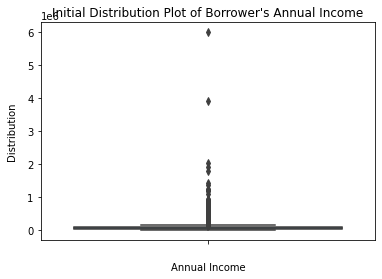

In [404]:
plt.title("Initial Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = df_cleaned)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

It is found that around 99th percentile the values started varying extremely. So the outliers are most likely to lie around **99th percentile**.

[]

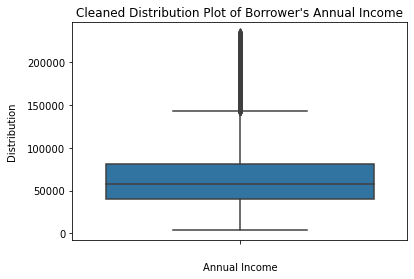

In [405]:
# Removing outliers

outliers = df_cleaned.annual_inc.quantile(0.99)

df_cleaned = df_cleaned[df_cleaned.annual_inc < outliers]

plt.title("Cleaned Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = df_cleaned)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

In [406]:
# Changing the dtypes of required column values like interest rate

df_cleaned.int_rate = df_cleaned.int_rate.apply(lambda x: float(x.replace(x[-1], '')))

In [407]:
df_cleaned.term = df_cleaned.term.apply(lambda x: int(x.split(' ')[1]))

In [408]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39316 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39316 non-null  object 
 1   funded_amnt           39316 non-null  object 
 2   funded_amnt_inv       39316 non-null  object 
 3   term                  39316 non-null  int64  
 4   int_rate              39316 non-null  float64
 5   installment           39316 non-null  object 
 6   grade                 39316 non-null  object 
 7   sub_grade             39316 non-null  object 
 8   emp_length            38246 non-null  object 
 9   home_ownership        39316 non-null  object 
 10  annual_inc            39316 non-null  int64  
 11  issue_d               39316 non-null  object 
 12  loan_status           39316 non-null  object 
 13  purpose               39316 non-null  object 
 14  title                 39305 non-null  object 
 15  addr_state         

In [409]:
# Removing title as it is unnecessary

df_cleaned.drop('title', axis = 1, inplace = True)

In [410]:
df_cleaned.shape

(39316, 30)

Now the data is ready to be analyzed

### Univariate and Segmented Univariate Analysis

In [411]:
# Create a function for Univariate Analysis
# source: stackoverflow

def set_plotting_variable(figure_title, xlabel, ylabel, xlabel_rotation, legend_flag, legend):
    
    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    
    if legend_flag == True:
        plt.legend(loc = legend)


def plot_univariate(category, plot_type, series, figsize_x, figsize_y, subplot_x, subplot_y,
                    xlabel, ylabel, x_axis, hue, data, legend, hspace, wspace, xlabel_rotation):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    if category == 'Categorical':
        
        title_1 = "Frequency Plot of " + xlabel
        title_2 = title_1 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        if plot_type == 'Unordered Categorical':
            sns.lineplot(data = series)
        
        elif plot_type == 'Ordered Categorical':
            sns.countplot(x = x_axis, order = series.sort_index().index, data = data)
        
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.countplot(x = x_axis, hue = hue, order = series.sort_index().index, data = data)
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, True, legend)
    
    elif category == 'Continuous':
        
        title_1 = "Distribution Plot of " + xlabel
        title_2 = "Box Plot of " + xlabel
        title_3 = title_2 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.boxplot(x = x_axis, data = data, color = 'm')
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 3
        plt.subplot(subplot_x, subplot_y, 3)
        
        sns.boxplot(x = x_axis, y = hue, order = series, data = data)
        # Call Custom Function
        set_plotting_variable(title_3, xlabel, "Loan Status", xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

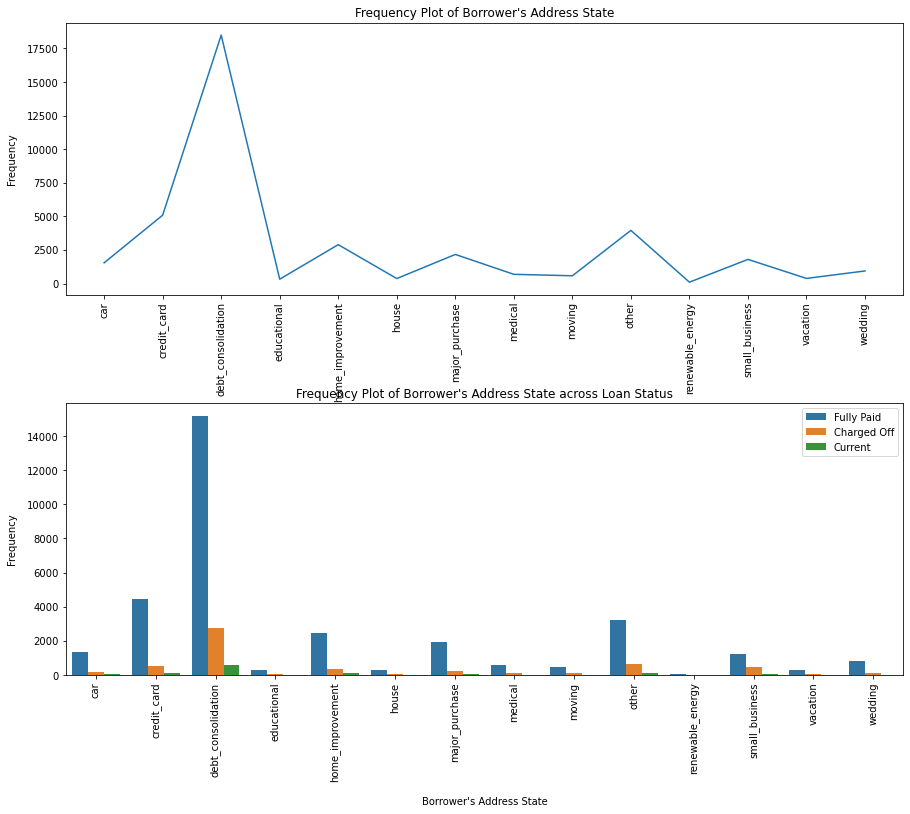

In [412]:
purposes = df_cleaned.purpose.value_counts(dropna = False)
plot_univariate(category = 'Categorical',
                plot_type = 'Unordered Categorical',
                series = purposes,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                xlabel = "Borrower's Address State",
                ylabel = "Frequency",
                x_axis = 'purpose',
                hue = 'loan_status',
                data = df_cleaned,
                legend = 'best',
                hspace = 0.4,
                wspace = 0,
                xlabel_rotation = 90)

From above analysis, the top 3 loan purposes in charged off are:

    1. debt_consolidation
    2. other
    3. credit_card
    
And for fully paid, the top 3 are:

    1. debt_consolidation
    2. credit_card
    3. other
   

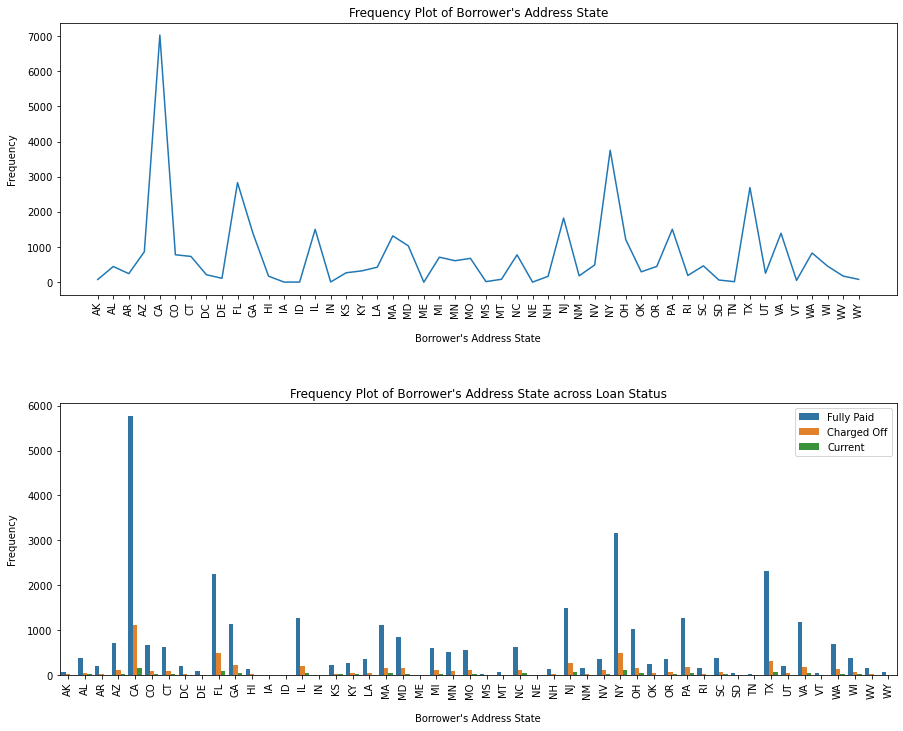

In [413]:
states = df_cleaned.addr_state.value_counts(dropna = False)
plot_univariate(category = 'Categorical',
                plot_type = 'Unordered Categorical',
                series = states,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                xlabel = "Borrower's Address State",
                ylabel = "Frequency",
                x_axis = 'addr_state',
                hue = 'loan_status',
                data = df_cleaned,
                legend = 'best',
                hspace = 0.4,
                wspace = 0,
                xlabel_rotation = 90)

From above analysis, top 3 states in charged off are: 
    
    1. CA
    2. NY
    3. FL
    
and for fully paid:

    1. CA
    2. NY
    3. TX

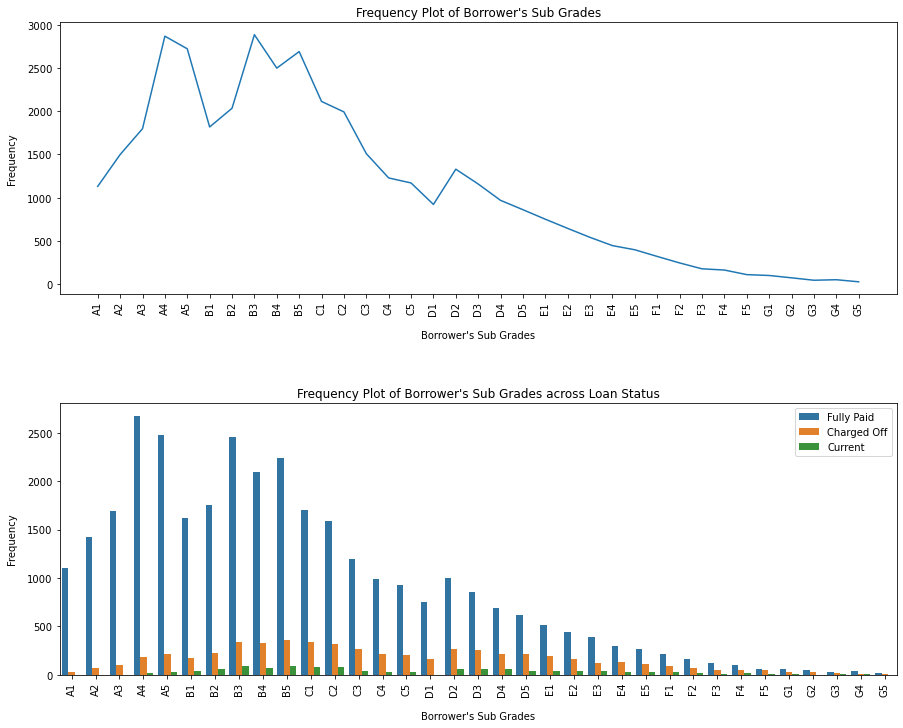

In [414]:
# Loan sub-grade

sub_grades = df_cleaned.sub_grade.value_counts(dropna = False)

plot_univariate(category = 'Categorical',
                plot_type = 'Unordered Categorical',
                series = sub_grades,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                xlabel = "Borrower's Sub Grades",
                ylabel = "Frequency",
                x_axis = 'sub_grade',
                hue = 'loan_status',
                data = df_cleaned,
                legend = 'best',
                hspace = 0.4,
                wspace = 0,
                xlabel_rotation = 90)

Top 3 subgrades in charged off are:
    
    1. Grade B => B3, B5, B4
    2. Grade C => C3, C4, C5
    3. Grade D => D3, D4, D5

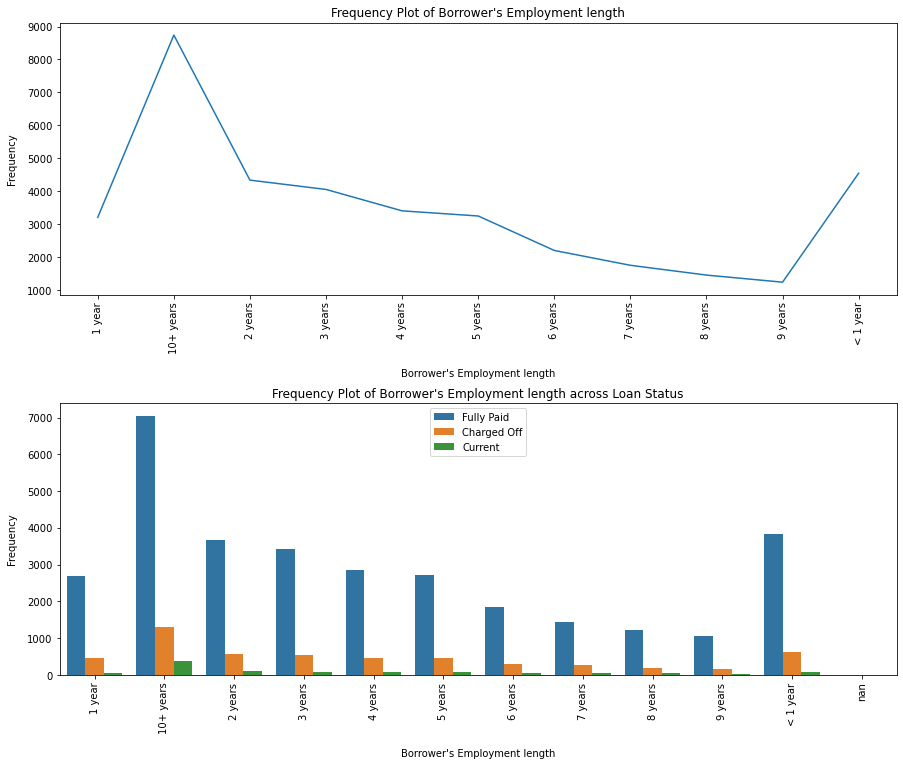

In [415]:
# employment length

emp_len = df_cleaned.emp_length.value_counts(dropna = False)

plot_univariate(category = 'Categorical',
                plot_type = 'Unordered Categorical',
                series = emp_len,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 1,
                xlabel = "Borrower's Employment length",
                ylabel = "Frequency",
                x_axis = 'emp_length',
                hue = 'loan_status',
                data = df_cleaned,
                legend = 'best',
                hspace = 0.4,
                wspace = 0,
                xlabel_rotation = 90)

From above analysis, top 3 employment lengths in charged off are:

    1. 10+ years
    2. <1 year
    3. 2 years

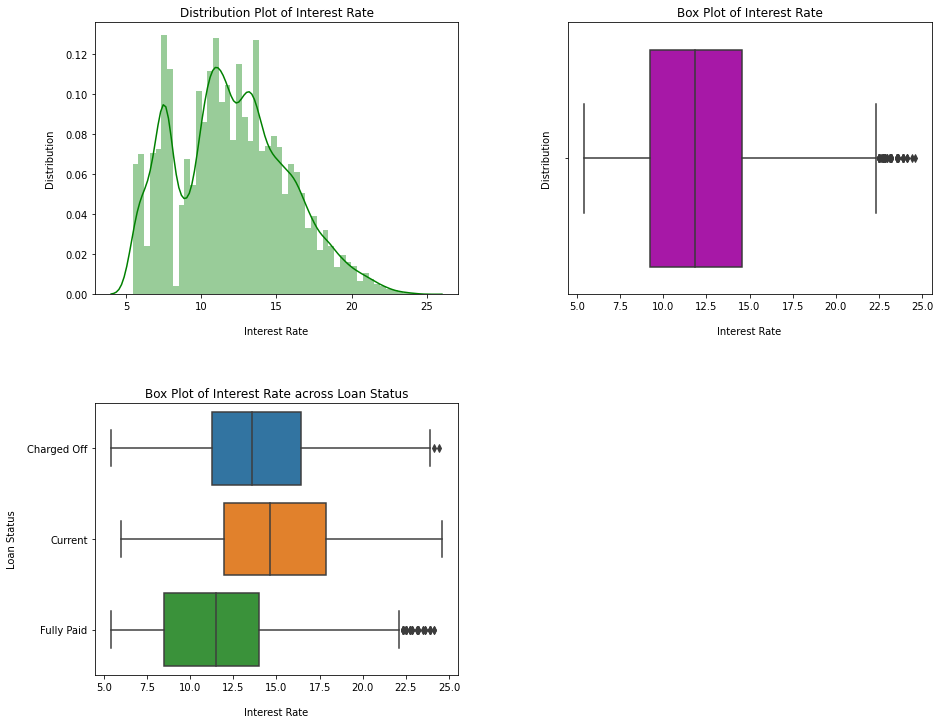

In [416]:
# Analyzing int_rate

plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = ['Charged Off', 'Current', 'Fully Paid'],
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "Interest Rate",
                ylabel = "Distribution",
                x_axis = 'int_rate',
                hue = 'loan_status',
                data = df_cleaned,
                legend = 'best',
                hspace = 0.4,
                wspace = 0.3,
                xlabel_rotation = 0)



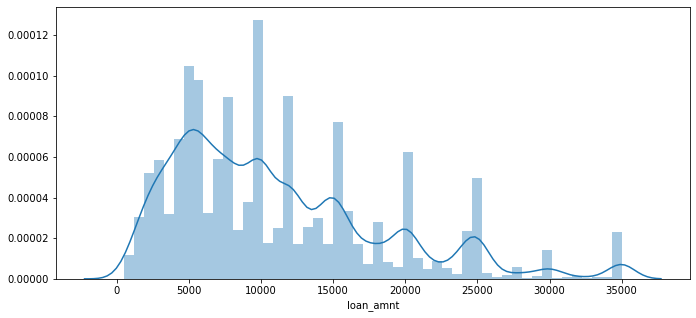

In [417]:
# Analyzing loan amnt

plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(df_cleaned.loan_amnt)
plt.show()

Text(0, 0.5, 'Distribution')

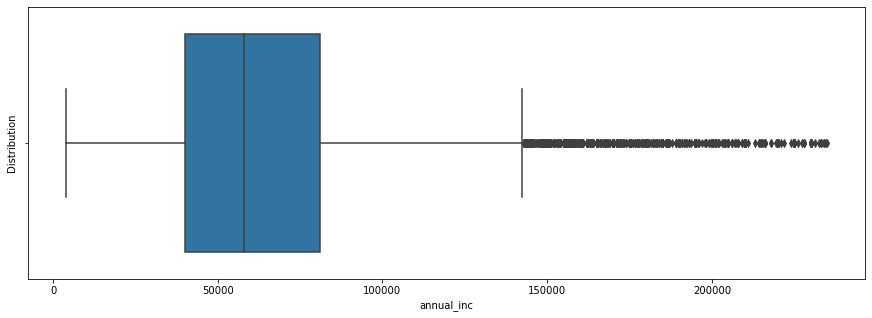

In [418]:
# Analyzing Installment and annual_inc
plt.figure(figsize=(15,5))
sns.boxplot(x = 'annual_inc', data =df_cleaned)
plt.ylabel('Distribution')

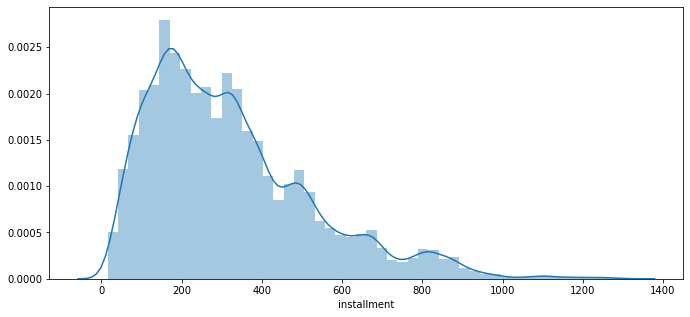

In [419]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(df_cleaned.installment)
plt.show()

### Bivariate Analysis

In [420]:
# Function to plot Bivariate analysis plots

def plot_bivariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, 
                   x_axis, y_axis, hspace, wspace, xlabel_rotation):
    
    legend = 'best'
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'aqua')
    # Call Custom Function
    title = "Line Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
    
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'mako')
    # Call Custom Function
    title = "Bar Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'black')
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'magma')
    # Call Custom Function
    title = "Joint Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

In [421]:
# Creating a Charged Off Rate pivot table
# Plotting Home Ownership vs Charged Off Percentage

df_hOwner = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_hOwner['Charged Off Rate'] = 100*(round((df_hOwner['Charged Off']/df_hOwner['Total']), 6))

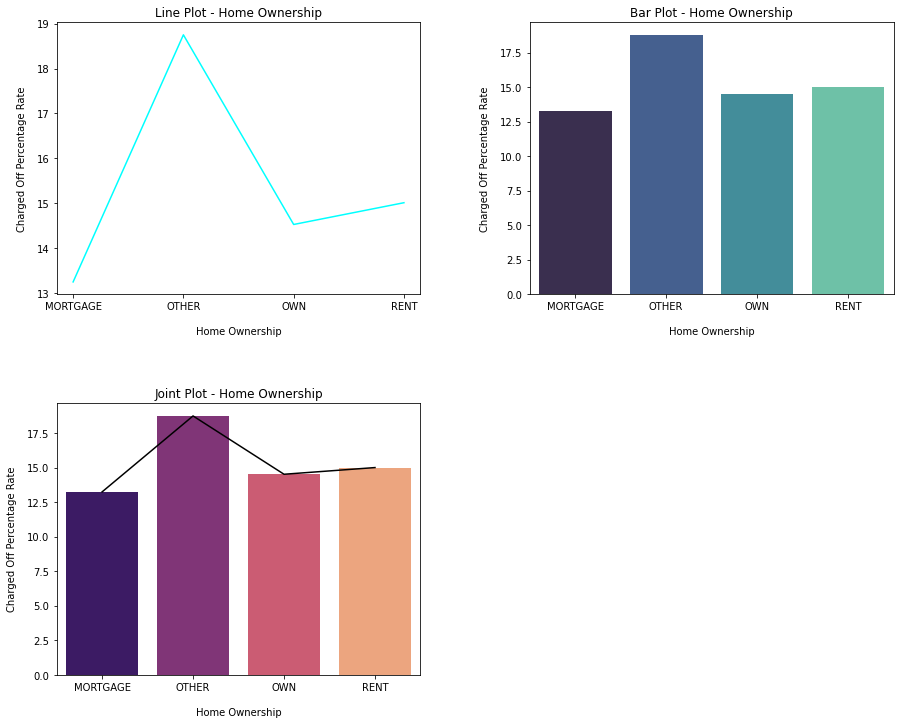

In [422]:
x_data = df_hOwner.iloc[0:-1].index
y_data = df_hOwner.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Home Ownership",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

In [423]:
# Purpose vs Charged Off Percentage

df_purpose = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_purpose['Charged Off Rate'] = 100*(round((df_purpose['Charged Off']/df_purpose['Total']), 6))

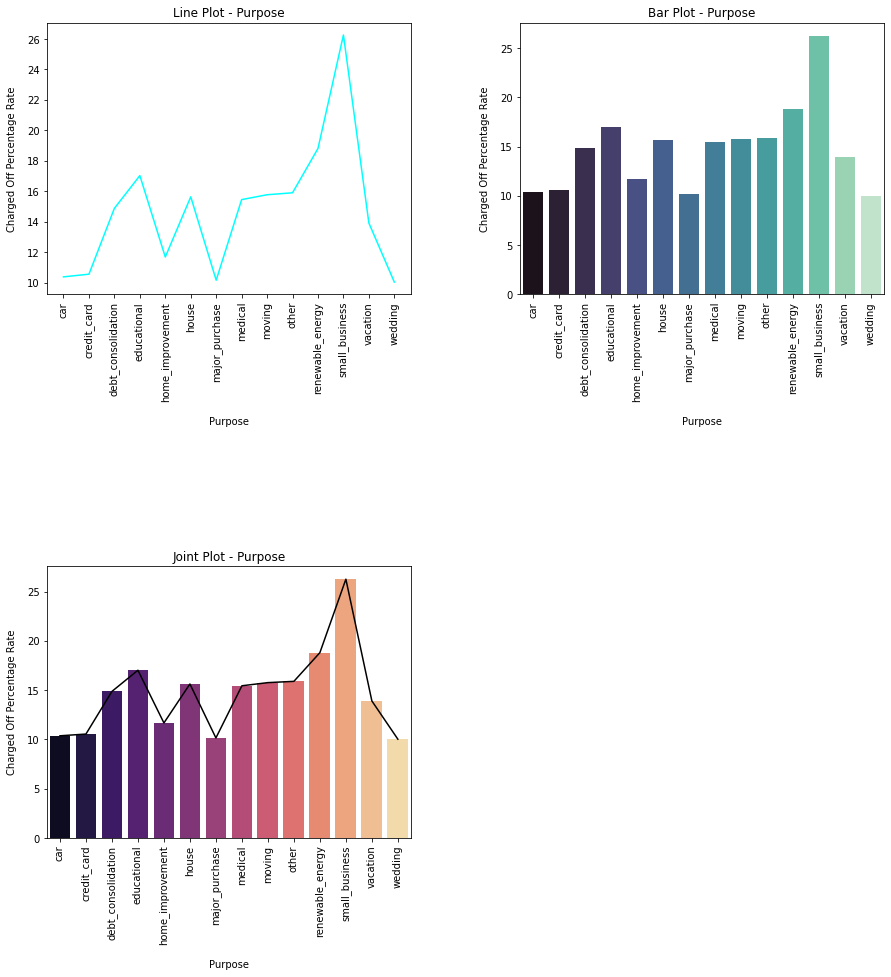

In [424]:
x_data = df_purpose.iloc[0:-1].index
y_data = df_purpose.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 15,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Purpose",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 1.0,
               wspace = 0.3,
               xlabel_rotation = 90)

In [425]:
# term vs Charged Off Percentage

df_term = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_term['Charged Off Rate'] = 100*(round((df_term['Charged Off']/df_term['Total']), 6))

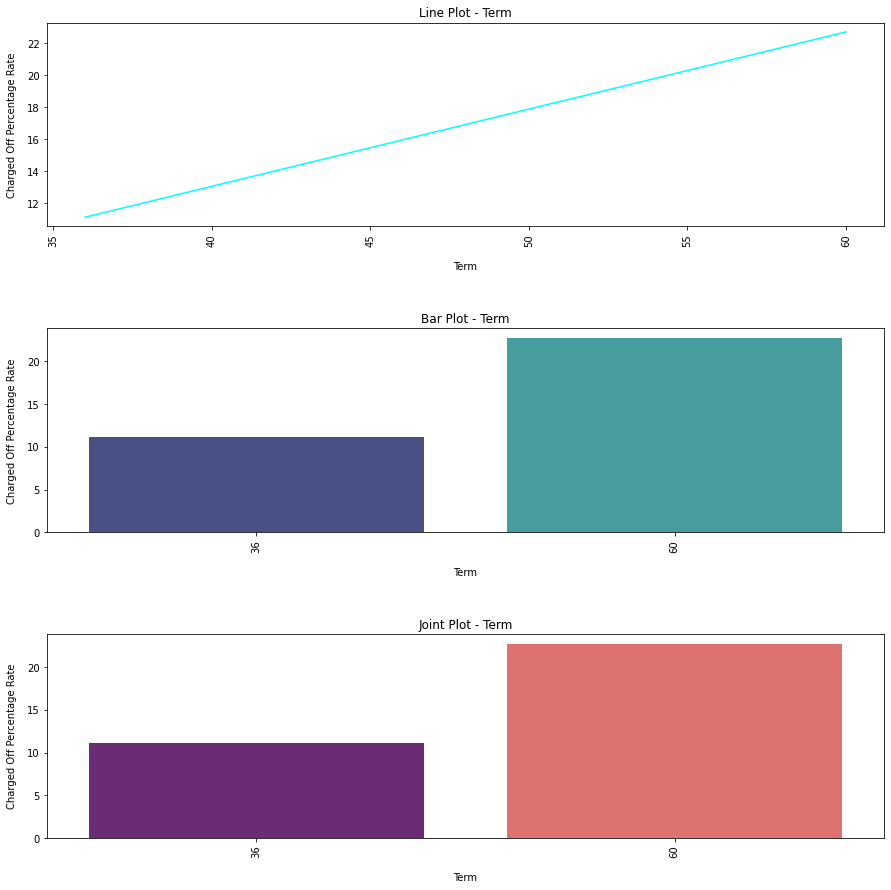

In [426]:
x_data = df_term.iloc[0:-1].index
y_data = df_term.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 15,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Term",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

In [427]:
# grade vs Charged Off Percentage

df_grade = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_grade['Charged Off Rate'] = 100*(round((df_grade['Charged Off']/df_grade['Total']), 6))

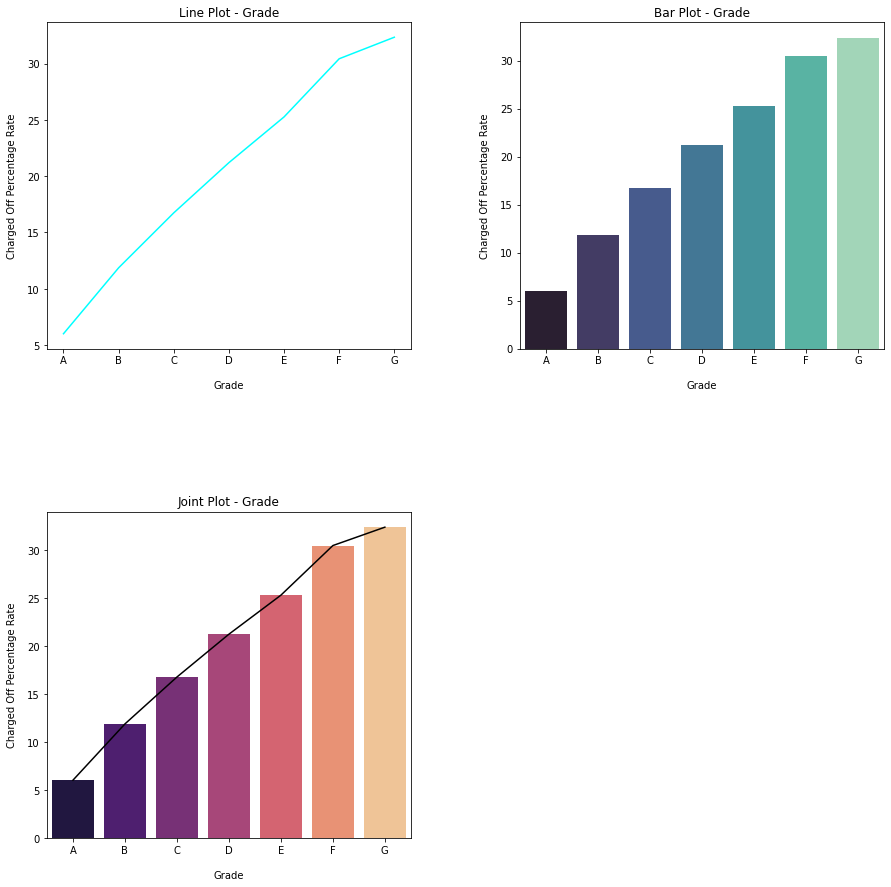

In [428]:
x_data = df_grade.iloc[0:-1].index
y_data = df_grade.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 15,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 0)

In [429]:
# sub_grade vs Charged Off Percentage

df_subgrade = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_subgrade['Charged Off Rate'] = 100*(round((df_subgrade['Charged Off']/df_subgrade['Total']), 6))

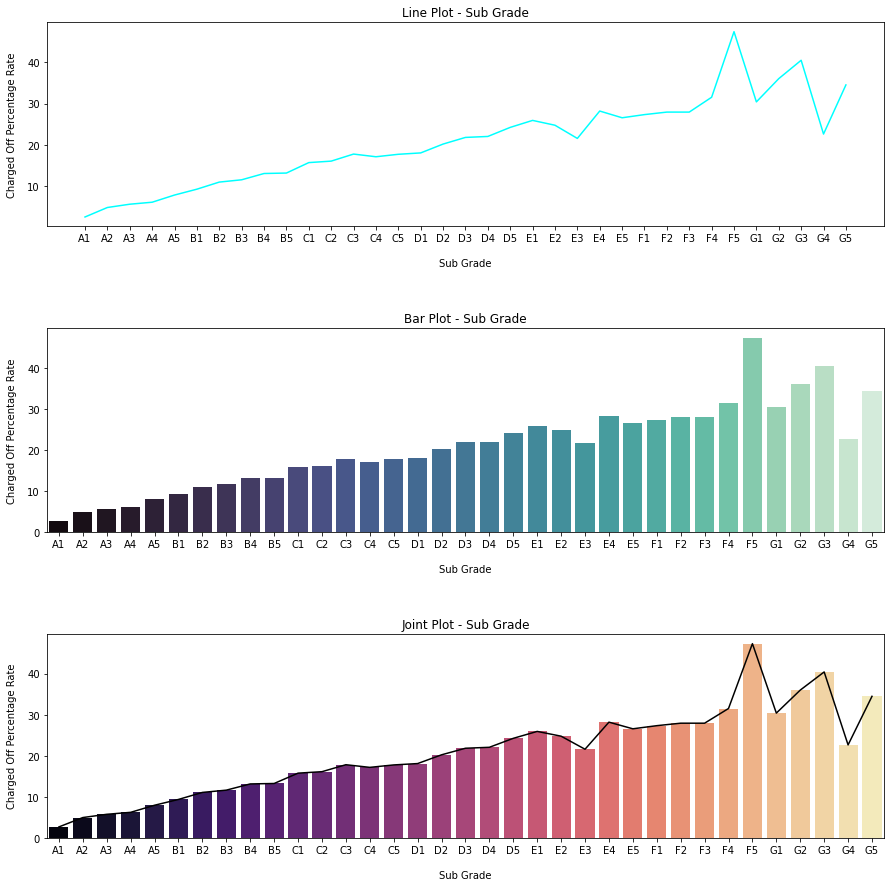

In [430]:
x_data = df_subgrade.iloc[0:-1].index
y_data = df_subgrade.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 15,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Sub Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 0)

In [431]:
# emp_length vs Charged Off Percentage

df_emplen = df_cleaned.pivot_table(values = 'funded_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_emplen['Charged Off Rate'] = 100*(round((df_emplen['Charged Off']/df_emplen['Total']), 6))

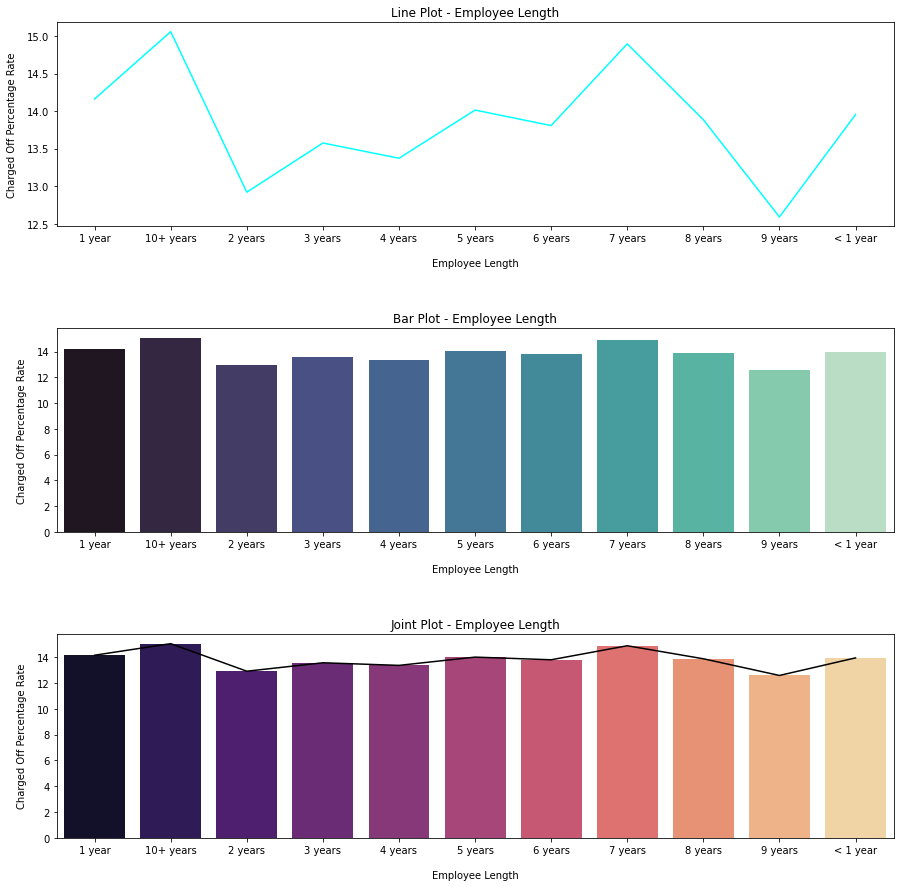

In [432]:
x_data = df_emplen.iloc[0:-1].index
y_data = df_emplen.iloc[0:-1]['Charged Off Rate']

plot_bivariate(figsize_x = 15,
               figsize_y = 15,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Employee Length",
               ylabel = "Charged Off Percentage Rate",
               x_axis = x_data,
               y_axis = y_data,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 0)

In [433]:
# Heat map
# converting dtypes to get a whole cluster

df_cleaned.loan_amnt = df_cleaned.loan_amnt.astype('float')
df_cleaned.funded_amnt = df_cleaned.funded_amnt.astype('float')
df_cleaned.funded_amnt_inv = df_cleaned.funded_amnt_inv.astype('float')
df_cleaned.installment = df_cleaned.installment.astype('float')
df_cleaned.dti = df_cleaned.dti.astype('float')
df_cleaned.delinq_2yrs = df_cleaned.delinq_2yrs.astype('float')
df_cleaned.inq_last_6mths = df_cleaned.inq_last_6mths.astype('float')
df_cleaned.total_acc = df_cleaned.total_acc.astype('float')
df_cleaned.total_pymnt = df_cleaned.total_pymnt.astype('float')
df_cleaned.total_pymnt_inv = df_cleaned.total_pymnt_inv.astype('float')
df_cleaned.pub_rec_bankruptcies = df_cleaned.pub_rec_bankruptcies.astype('float')

In [434]:
corr = df_cleaned.corr()
corr['loan_amnt']

loan_amnt               1.00
funded_amnt             0.98
funded_amnt_inv         0.94
term                    0.36
int_rate                0.31
installment             0.93
annual_inc              0.42
dti                     0.08
delinq_2yrs            -0.03
inq_last_6mths          0.01
total_acc               0.25
total_pymnt             0.89
total_pymnt_inv         0.85
pub_rec_bankruptcies   -0.04
Name: loan_amnt, dtype: float64

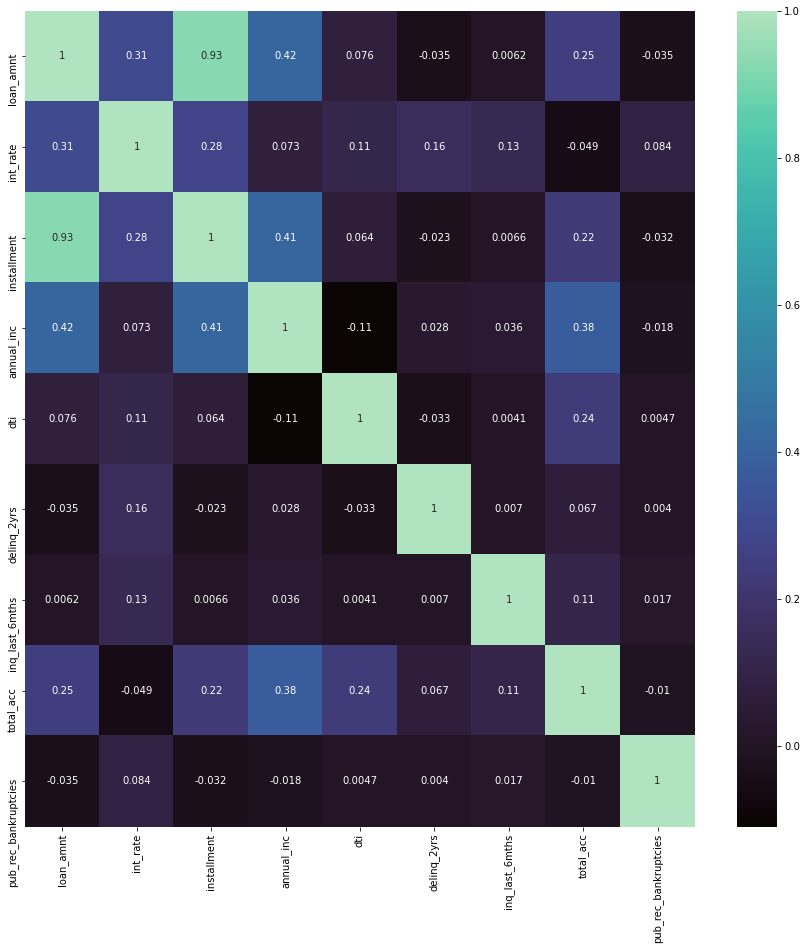

In [435]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df_cleaned[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap='mako')
plt.show()

### Summary

1. Interest Rate:

Charged Off Rate is high for interest rate:
    1. 20-25   = 34.44%
    2. 15-20   = 23.51%
As the Interest Rate increases, Charge Off Rate Increases.

2. Annual Income:

Charged Off Rate is high for Annual Income:
    1. 0-20000       = 19.93%
    2. 20000-40000   = 17.43%
    3. 40000-60000   = 14.90%
So, as the Anual Income decreases, Charge Off Rate Increases.

3. Sub Grade:

Most of the Charged off applicants belong to Grade B, C and D.   
    1. Grade B => B3, B5, B4
    2. Grade C => C3, C4, C5
    3. Grade D => D3, D4, D5
    
4. Term:

Charge Off Rate increases as the Term increases.

5. Loan Purpose:

Charged Off Rate is high for loan purpose:
    1. small_business    = 26.27%
    2. renewable_energy  = 18.81%
    3. educational       = 17.03%
    
6. Employment Length

Charged Off Rate is high for employment length:
    1.  <1 year
    2.  1 year